In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv3D, Flatten,MaxPooling3D,AveragePooling3D, concatenate,Input ,SpatialDropout3D,Dropout
import keras
from math import e
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from sklearn.model_selection import KFold

In [2]:
inputData = xr.open_dataset('CNN_input.nc')

In [4]:
t2mTsAll=inputData.t2mTsAll
wsTsAll=inputData.wsTsAll
rhTsAll=inputData.rhTsAll
invTsAll=inputData.invTsAll
wTsAll=inputData.wTsAll
ushearTsAll=inputData.ushearTsAll
AO5DAll=inputData.AO5DAll
EU5DAll=inputData.EU5DAll
SST30DAll=inputData.SST30DAll

In [5]:
fogData = xr.open_dataset('../../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-1-1','2018-12-31'))
yAll=yAll/25.0

In [6]:
t2m_train,t2m_test,ws_train,ws_test,rh_train,rh_test,inv_train,inv_test, w_train, w_test,ushear_train, ushear_test,AO5D_train,AO5D_test,EU5D_train,EU5D_test,SST30D_train,SST30D_test,y_train,y_test= train_test_split( t2mTsAll,wsTsAll,rhTsAll,invTsAll, wTsAll,ushearTsAll,AO5DAll,EU5DAll,SST30DAll,yAll,test_size=0.20, random_state=0)

In [7]:
t2mtrain=t2m_train.values
t2mtrain=t2mtrain[:,:,:,None]
t2mtrain.shape


wstrain=ws_train.values
wstrain=wstrain[:,:,:,None]
wstrain.shape

rhtrain=rh_train.values
rhtrain=rhtrain[:,:,:,None]
rhtrain.shape


invtrain=inv_train.values
invtrain=invtrain[:,:,:,None]
invtrain.shape

wtrain=w_train.values
wtrain=wtrain[:,:,:,None]
wtrain.shape

usheartrain=ushear_train.values
usheartrain=usheartrain[:,:,:,None]
usheartrain.shape

AO5Dtrain=AO5D_train.values
AO5Dtrain=AO5Dtrain[:,:,:,None]
AO5Dtrain.shape

EU5Dtrain=EU5D_train.values
EU5Dtrain=EU5Dtrain[:,:,:,None]
EU5Dtrain.shape

SST30Dtrain=SST30D_train.values
SST30Dtrain=SST30Dtrain[:,:,:,None]
SST30Dtrain.shape

(1934, 18, 26, 1)

In [8]:
t2mtest=t2m_test.values
t2mtest=t2mtest[:,:,:,None]
t2mtest.shape


wstest=ws_test.values
wstest=wstest[:,:,:,None]
wstest.shape

rhtest=rh_test.values
rhtest=rhtest[:,:,:,None]
rhtest.shape


invtest=inv_test.values
invtest=invtest[:,:,:,None]
invtest.shape

wtest=w_test.values
wtest=wtest[:,:,:,None]
wtest.shape

usheartest=ushear_test.values
usheartest=usheartest[:,:,:,None]
usheartest.shape

AO5Dtest=AO5D_test.values
AO5Dtest=AO5Dtest[:,:,:,None]
AO5Dtest.shape

EU5Dtest=EU5D_test.values
EU5Dtest=EU5Dtest[:,:,:,None]
EU5Dtest.shape

SST30Dtest=SST30D_test.values
SST30Dtest=SST30Dtest[:,:,:,None]
SST30Dtest.shape

(484, 18, 26, 1)

In [9]:
ytrain=y_train.values
ytrain=ytrain[:,None]
ytrain.shape
ytest=y_test.values
ytest=ytest[:,None]
ytest.shape

(484, 1)

#AO1D

Epoch 1/20
61/61 [==============================] - 3s 25ms/step - loss: 0.1867 - mse: 0.0568
Epoch 2/20
61/61 [==============================] - 1s 23ms/step - loss: 0.1681 - mse: 0.0447
Epoch 3/20
61/61 [==============================] - 1s 24ms/step - loss: 0.1593 - mse: 0.0401
Epoch 4/20
61/61 [==============================] - 1s 24ms/step - loss: 0.1421 - mse: 0.0322
Epoch 5/20
61/61 [==============================] - 1s 24ms/step - loss: 0.1257 - mse: 0.0269
Epoch 6/20
61/61 [==============================] - 1s 24ms/step - loss: 0.1131 - mse: 0.0214
Epoch 7/20
61/61 [==============================] - 2s 25ms/step - loss: 0.1010 - mse: 0.0171
Epoch 8/20
61/61 [==============================] - 1s 24ms/step - loss: 0.0968 - mse: 0.0157
Epoch 9/20
61/61 [==============================] - 1s 24ms/step - loss: 0.0963 - mse: 0.0159
Epoch 10/20
61/61 [==============================] - 1s 24ms/step - loss: 0.0961 - mse: 0.0155
Epoch 11/20
61/61 [==============================] - 1s 24m

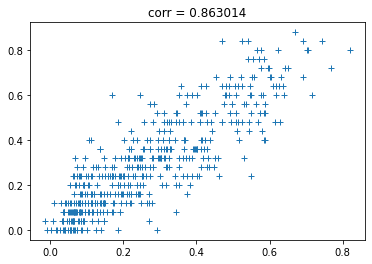

In [11]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,AO5Dtest,EU5Dtest,SST30Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,aotest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,AO5Dtrain,EU5Dtrain,SST30Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,aotrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
61/61 [==============================] - 2s 25ms/step - loss: 0.1871 - mse: 0.0571
Epoch 2/100
61/61 [==============================] - 1s 24ms/step - loss: 0.1721 - mse: 0.0463
Epoch 3/100
61/61 [==============================] - 1s 24ms/step - loss: 0.1489 - mse: 0.0359
Epoch 4/100
61/61 [==============================] - 1s 24ms/step - loss: 0.1372 - mse: 0.0312
Epoch 5/100
61/61 [==============================] - 1s 24ms/step - loss: 0.1323 - mse: 0.0285
Epoch 6/100
61/61 [==============================] - 1s 24ms/step - loss: 0.1250 - mse: 0.0257
Epoch 7/100
61/61 [==============================] - 1s 23ms/step - loss: 0.1091 - mse: 0.0214
Epoch 8/100
61/61 [==============================] - 2s 25ms/step - loss: 0.1037 - mse: 0.0186: 1s - loss: 0.10
Epoch 9/100
61/61 [==============================] - 1s 24ms/step - loss: 0.0959 - mse: 0.0154
Epoch 10/100
61/61 [==============================] - 1s 24ms/step - loss: 0.0943 - mse: 0.0148
Epoch 11/100
61/61 [============

61/61 [==============================] - 1s 24ms/step - loss: 0.0380 - mse: 0.0025
Epoch 84/100
61/61 [==============================] - 1s 23ms/step - loss: 0.0373 - mse: 0.0025
Epoch 85/100
61/61 [==============================] - 1s 23ms/step - loss: 0.0395 - mse: 0.0028
Epoch 86/100
61/61 [==============================] - 1s 23ms/step - loss: 0.0385 - mse: 0.0026
Epoch 87/100
61/61 [==============================] - 1s 23ms/step - loss: 0.0372 - mse: 0.0024
Epoch 88/100
61/61 [==============================] - 1s 24ms/step - loss: 0.0378 - mse: 0.0025
Epoch 89/100
61/61 [==============================] - 1s 24ms/step - loss: 0.0404 - mse: 0.0029
Epoch 90/100
61/61 [==============================] - 2s 25ms/step - loss: 0.0369 - mse: 0.0024
Epoch 91/100
61/61 [==============================] - 1s 24ms/step - loss: 0.0386 - mse: 0.0026
Epoch 92/100
61/61 [==============================] - 1s 24ms/step - loss: 0.0381 - mse: 0.0025
Epoch 93/100
61/61 [==============================] -

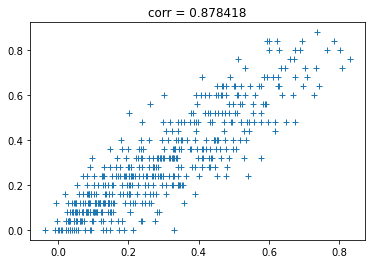

In [28]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,AO5Dtest,EU5Dtest,SST30Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,aotest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,AO5Dtrain,EU5Dtrain,SST30Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,aotrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=100)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

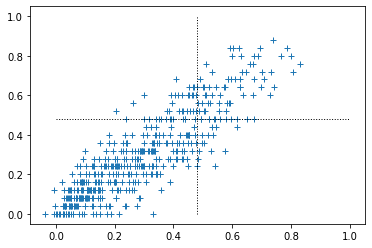

In [34]:
x1=(0.48,0.48)
y1=(0,1)
x2=(0,1)
y2=(0.48,0.48)
plt.plot(yy_test,y_test,'+')
plt.plot(x1,y1, linestyle = ":", lw=1,color = 'black')
plt.plot(x2,y2, linestyle = ":", lw=1,color = 'black')

Epoch 1/500
61/61 [==============================] - 2s 25ms/step - loss: 0.1979 - mse: 0.0622
Epoch 2/500
61/61 [==============================] - 1s 24ms/step - loss: 0.1731 - mse: 0.0467
Epoch 3/500
61/61 [==============================] - 1s 24ms/step - loss: 0.1621 - mse: 0.0431
Epoch 4/500
61/61 [==============================] - 1s 24ms/step - loss: 0.1606 - mse: 0.0413
Epoch 5/500
61/61 [==============================] - 1s 24ms/step - loss: 0.1436 - mse: 0.0350
Epoch 6/500
61/61 [==============================] - 1s 24ms/step - loss: 0.1208 - mse: 0.0247
Epoch 7/500
61/61 [==============================] - 1s 25ms/step - loss: 0.1081 - mse: 0.0192
Epoch 8/500
61/61 [==============================] - 1s 24ms/step - loss: 0.1081 - mse: 0.0207
Epoch 9/500
61/61 [==============================] - 1s 24ms/step - loss: 0.1026 - mse: 0.0175
Epoch 10/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0979 - mse: 0.0163
Epoch 11/500
61/61 [=============================

61/61 [==============================] - 1s 23ms/step - loss: 0.0414 - mse: 0.0029
Epoch 84/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0402 - mse: 0.0028
Epoch 85/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0398 - mse: 0.0027
Epoch 86/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0403 - mse: 0.0030
Epoch 87/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0379 - mse: 0.0024
Epoch 88/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0386 - mse: 0.0025
Epoch 89/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0375 - mse: 0.0024
Epoch 90/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0390 - mse: 0.0027
Epoch 91/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0374 - mse: 0.0025
Epoch 92/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0380 - mse: 0.0025
Epoch 93/500
61/61 [==============================] -

61/61 [==============================] - 1s 23ms/step - loss: 0.0314 - mse: 0.0016
Epoch 168/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0313 - mse: 0.0017
Epoch 169/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0307 - mse: 0.0016
Epoch 170/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0308 - mse: 0.0016
Epoch 171/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0288 - mse: 0.0015
Epoch 172/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0311 - mse: 0.0016
Epoch 173/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0292 - mse: 0.0015
Epoch 174/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0304 - mse: 0.0016
Epoch 175/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0305 - mse: 0.0017
Epoch 176/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0285 - mse: 0.0015
Epoch 177/500
61/61 [=======================

61/61 [==============================] - 2s 26ms/step - loss: 0.0263 - mse: 0.0012
Epoch 252/500
61/61 [==============================] - 2s 25ms/step - loss: 0.0257 - mse: 0.0012
Epoch 253/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0270 - mse: 0.0013
Epoch 254/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0293 - mse: 0.0016
Epoch 255/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0256 - mse: 0.0012
Epoch 256/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0259 - mse: 0.0012
Epoch 257/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0248 - mse: 0.0011
Epoch 258/500
61/61 [==============================] - 2s 25ms/step - loss: 0.0269 - mse: 0.0013
Epoch 259/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0268 - mse: 0.0013
Epoch 260/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0258 - mse: 0.0012
Epoch 261/500
61/61 [=======================

61/61 [==============================] - 1s 23ms/step - loss: 0.0240 - mse: 0.0010
Epoch 336/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0242 - mse: 0.0010
Epoch 337/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0239 - mse: 0.0010
Epoch 338/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0239 - mse: 9.7273e-04
Epoch 339/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0234 - mse: 9.6741e-04
Epoch 340/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0232 - mse: 9.9835e-04
Epoch 341/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0246 - mse: 0.0011
Epoch 342/500
61/61 [==============================] - 1s 23ms/step - loss: 0.0239 - mse: 0.0010
Epoch 343/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0229 - mse: 8.8388e-04
Epoch 344/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0236 - mse: 9.6618e-04
Epoch 345/500
61/61 [===

61/61 [==============================] - 1s 24ms/step - loss: 0.0232 - mse: 9.4904e-04
Epoch 418/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0221 - mse: 8.8222e-04
Epoch 419/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0220 - mse: 8.5852e-04
Epoch 420/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0213 - mse: 7.8212e-04
Epoch 421/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0217 - mse: 8.5023e-04
Epoch 422/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0237 - mse: 0.0010
Epoch 423/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0223 - mse: 8.8358e-04
Epoch 424/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0220 - mse: 8.9203e-04
Epoch 425/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0219 - mse: 8.5389e-04
Epoch 426/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0226 - mse: 8.9910e-04
Epoch 42

61/61 [==============================] - 2s 25ms/step - loss: 0.0221 - mse: 8.4919e-04
Epoch 499/500
61/61 [==============================] - 1s 24ms/step - loss: 0.0211 - mse: 7.9259e-04
Epoch 500/500
61/61 [==============================] - 2s 25ms/step - loss: 0.0216 - mse: 8.3814e-04
mse: 1.03%


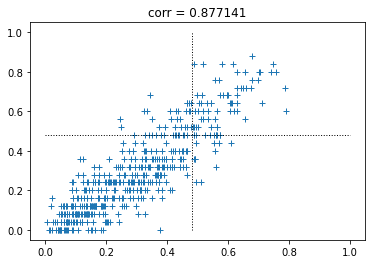

In [35]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,AO5Dtest,EU5Dtest,SST30Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,aotest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,AO5Dtrain,EU5Dtrain,SST30Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,aotrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=500)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

x1=(0.48,0.48)
y1=(0,1)
x2=(0,1)
y2=(0.48,0.48)
plt.plot(yy_test,y_test,'+')
plt.plot(x1,y1, linestyle = ":", lw=1,color = 'black')
plt.plot(x2,y2, linestyle = ":", lw=1,color = 'black')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/45
61/61 [==============================] - 2s 28ms/step - loss: 0.2089 - mse: 0.0744
Epoch 2/45
61/61 [==============================] - 2s 28ms/step - loss: 0.1717 - mse: 0.0466
Epoch 3/45
61/61 [==============================] - 2s 28ms/step - loss: 0.1581 - mse: 0.0391
Epoch 4/45
61/61 [==============================] - 2s 29ms/step - loss: 0.1486 - mse: 0.0354
Epoch 5/45
61/61 [==============================] - 2s 28ms/step - loss: 0.1246 - mse: 0.0250
Epoch 6/45
61/61 [==============================] - 2s 27ms/step - loss: 0.1161 - mse: 0.0228
Epoch 7/45
61/61 [==============================] - 2s 28ms/step - loss: 0.1170 - mse: 0.0237
Epoch 8/45
61/61 [==============================] - 2s 27ms/step - loss: 0.1016 - mse: 0.0180
Epoch 9/45
61/61 [==============================] - 2s 30ms/step - loss: 0.0969 - mse: 0.0152
Epoch 10/45
61/61 [==============================] - 2s 28ms/step - loss: 0.0921 - mse: 0.0142
Epoch 11/45
61/61 [==============================] - 2s 28m

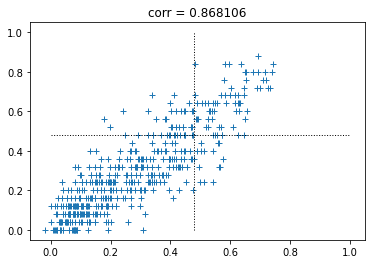

In [42]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,AO5Dtest,EU5Dtest,SST30Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,aotest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,AO5Dtrain,EU5Dtrain,SST30Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,aotrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=45)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

x1=(0.48,0.48)
y1=(0,1)
x2=(0,1)
y2=(0.48,0.48)
plt.plot(yy_test,y_test,'+')
plt.plot(x1,y1, linestyle = ":", lw=1,color = 'black')
plt.plot(x2,y2, linestyle = ":", lw=1,color = 'black')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/45
61/61 [==============================] - 2s 18ms/step - loss: 0.1870 - mse: 0.0556
Epoch 2/45
61/61 [==============================] - 1s 18ms/step - loss: 0.1723 - mse: 0.0495
Epoch 3/45
61/61 [==============================] - 1s 18ms/step - loss: 0.1268 - mse: 0.0262
Epoch 4/45
61/61 [==============================] - 1s 17ms/step - loss: 0.1121 - mse: 0.0203
Epoch 5/45
61/61 [==============================] - 1s 17ms/step - loss: 0.1110 - mse: 0.0207
Epoch 6/45
61/61 [==============================] - 1s 17ms/step - loss: 0.0961 - mse: 0.0155
Epoch 7/45
61/61 [==============================] - 1s 17ms/step - loss: 0.0956 - mse: 0.0154
Epoch 8/45
61/61 [==============================] - 1s 17ms/step - loss: 0.0934 - mse: 0.0145
Epoch 9/45
61/61 [==============================] - 1s 17ms/step - loss: 0.0912 - mse: 0.0144
Epoch 10/45
61/61 [==============================] - 1s 17ms/step - loss: 0.0863 - mse: 0.0127
Epoch 11/45
61/61 [==============================] - 1s 17m

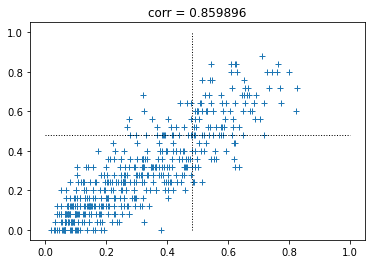

In [41]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,aotest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,aotrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=45)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

x1=(0.48,0.48)
y1=(0,1)
x2=(0,1)
y2=(0.48,0.48)
plt.plot(yy_test,y_test,'+')
plt.plot(x1,y1, linestyle = ":", lw=1,color = 'black')
plt.plot(x2,y2, linestyle = ":", lw=1,color = 'black')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/45
61/61 [==============================] - 4s 26ms/step - loss: 0.1903 - mse: 0.0588
Epoch 2/45
61/61 [==============================] - 1s 23ms/step - loss: 0.1753 - mse: 0.0483
Epoch 3/45
61/61 [==============================] - 1s 23ms/step - loss: 0.1679 - mse: 0.0449
Epoch 4/45
61/61 [==============================] - 1s 24ms/step - loss: 0.1412 - mse: 0.0326
Epoch 5/45
61/61 [==============================] - 1s 23ms/step - loss: 0.1256 - mse: 0.0269
Epoch 6/45
61/61 [==============================] - 1s 24ms/step - loss: 0.1168 - mse: 0.0227
Epoch 7/45
61/61 [==============================] - 1s 24ms/step - loss: 0.1085 - mse: 0.0195
Epoch 8/45
61/61 [==============================] - 1s 24ms/step - loss: 0.1042 - mse: 0.0186
Epoch 9/45
61/61 [==============================] - 1s 23ms/step - loss: 0.1034 - mse: 0.0175
Epoch 10/45
61/61 [==============================] - 1s 24ms/step - loss: 0.0967 - mse: 0.0159
Epoch 11/45
61/61 [==============================] - 1s 24m

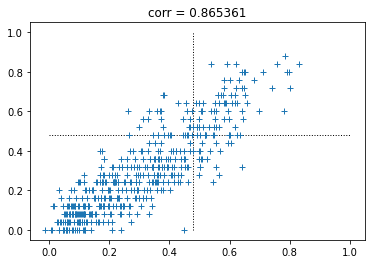

In [47]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,AO5Dtest,EU5Dtest,SST30Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,aotest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,AO5Dtrain,EU5Dtrain,SST30Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,aotrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=45)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

x1=(0.48,0.48)
y1=(0,1)
x2=(0,1)
y2=(0.48,0.48)
plt.plot(x1,y1, linestyle = ":", lw=1,color = 'black')
plt.plot(x2,y2, linestyle = ":", lw=1,color = 'black')
plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))